# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)


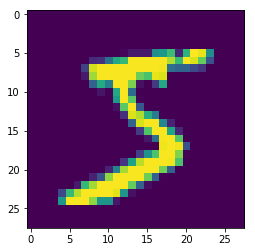

In [4]:
print (x_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [0]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Current Changes made in the code : L2, Image norm**
.

1.   Added L2 regularization with a factor 0.0001. Adding only a small value has not diminished the performance of the model with no over fitting. In our base model, dropout was used to avoid overfitting. A high value of L2 regularization is determined to the model performance, which leads to reduced accuracy due to weight decay.

2.   Moved 'relu' activation from before BatchNormalization(BN) to after BN. There is no perticular reason why it should be placed before or after BN. And there is no performance difference either ways.Though the research community is debating over this .

3.  Performed Image normalization using pixel feature based standart normalization. Here each pixel is considered a feature, this is equalient  to doing BN on the input image.  So BN is just an extension of Image normalization onto all the layers of CNN, batch wise. 

Conclusion : After training the model for 40 epochs, I managed to get an accuracy of 99.44% accuracy on train data and 99.5% accuracy on validation data with 12,750 paramerters. Which meets the requirement.




In [10]:
from keras.layers import Activation
from keras import regularizers
model = Sequential()

# input layer and the first conv layer 
model.add(Convolution2D(10, 3, 3,W_regularizer=regularizers.l2(0.0001), input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

# first conv block
model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001))) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(24, 3, 3, W_regularizer=regularizers.l2(0.0001))) # 22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

# first transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
# model.add(Dropout(0.1))

# second conv block
model.add(Convolution2D(16, 3, 3, W_regularizer=regularizers.l2(0.0001))) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(24, 3, 3, W_regularizer=regularizers.l2(0.0001))) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

# second transition block
model.add(MaxPooling2D(pool_size=(2, 2))) # 3

# Last conv block flowed by softmax
model.add(Convolution2D(10, 3, W_regularizer=regularizers.l2(0.0001))) # 1
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0617 12:11:24.088240 139663481087872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  
W0617 12:11:24.104297 139663481087872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 12:11:24.108441 139663481087872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 12:11:24.143920 139663481087872 deprecation_wrapper.py:119] From /usr/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 3, kernel_regularizer=<keras.reg...)`


In [11]:
adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8,decay=0.0005)
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

W0617 12:11:29.669858 139663481087872 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)

train_iterator = datagen.flow(X_train, Y_train, batch_size=128)
test_iterator = datagen.flow(X_test, Y_test, batch_size=128)

In [0]:
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

In [14]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test))

model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40, verbose=1, callbacks=[mcp_save], validation_data=test_iterator,
                    validation_steps=len(test_iterator))

W0617 12:11:36.280528 139663481087872 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


469/469 [==============================] - 15s 31ms/step - loss: 0.1943 - acc: 0.9462 - val_loss: 0.0697 - val_acc: 0.9854
Epoch 2/40
469/469 [==============================] - 12s 26ms/step - loss: 0.0818 - acc: 0.9811 - val_loss: 0.0654 - val_acc: 0.9870
Epoch 3/40
469/469 [==============================] - 12s 26ms/step - loss: 0.0739 - acc: 0.9844 - val_loss: 0.0775 - val_acc: 0.9844
Epoch 4/40
469/469 [==============================] - 12s 26ms/step - loss: 0.0672 - acc: 0.9859 - val_loss: 0.0648 - val_acc: 0.9857
Epoch 5/40
469/469 [==============================] - 12s 26ms/step - loss: 0.0653 - acc: 0.9867 - val_loss: 0.0695 - val_acc: 0.9862
Epoch 6/40
469/469 [==============================] - 12s 26ms/step - loss: 0.0620 - acc: 0.9880 - val_loss: 0.0541 - val_acc: 0.9914
Epoch 7/40
469/469 [==============================] - 12s 26ms/step - loss: 0.0605 - acc: 0.9879 - val_loss: 0.0623 - val_acc: 0.9865
Epoch 8/40
469/469 [==============================] - 12s 26ms/step - los

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03359505634903908, 0.9945]


In [16]:
# score = model.evaluate(X_test, Y_test, verbose=0)
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator),verbose=1)
print(acc)
print(len(test_iterator))

22/79 [=======>......................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


79/79 [==============================] - 1s 8ms/step
0.9946
79


### To find out 25 misclassified images from the validation dataset and create an image gallery

In the following code, Saving the first 25 wrongly predicted images among the test set.
For  these wrongly classified examples are saved into a list of tuples. Each tuple will have three elements with image data tensor, predicted value and the actual values.

In the subsiquent cell, I will use the list of 25 wrong prediction **tuple** to plot and show image using **matplotlib**.

In [24]:
j,t = 0, 0
X_test_wrong = []
for i in range(len(X_test)):
  img_data = x_test[i].reshape(1, 28, 28,1)
  t += 1
  if np.argmax(model.predict(img_data)) != np.argmax(Y_test[i]):
    X_test_wrong.append((img_data, np.argmax(model.predict(img_data)), np.argmax(Y_test[i])))
    j += 1
  if j >= 25:
    break
print('total false preds {} for samples {}'.format(j,t))


total false preds 25 for samples 2655


#### Miss classified images:
With visual inspection of the misclassified images we can say that, mistake in proper classification is not entirely due to imperfection of the model. It is the imperfect samples.
Even a human can get confused with most of the examples bellow. 

We can also observe that the predicted values are close to what they would have been, if not the actual values. In some cases the images are actually close to the predicted class than the actual class.

With these observations, we can conclude that model accuracy/performance is much better than we see on the validation and train data.


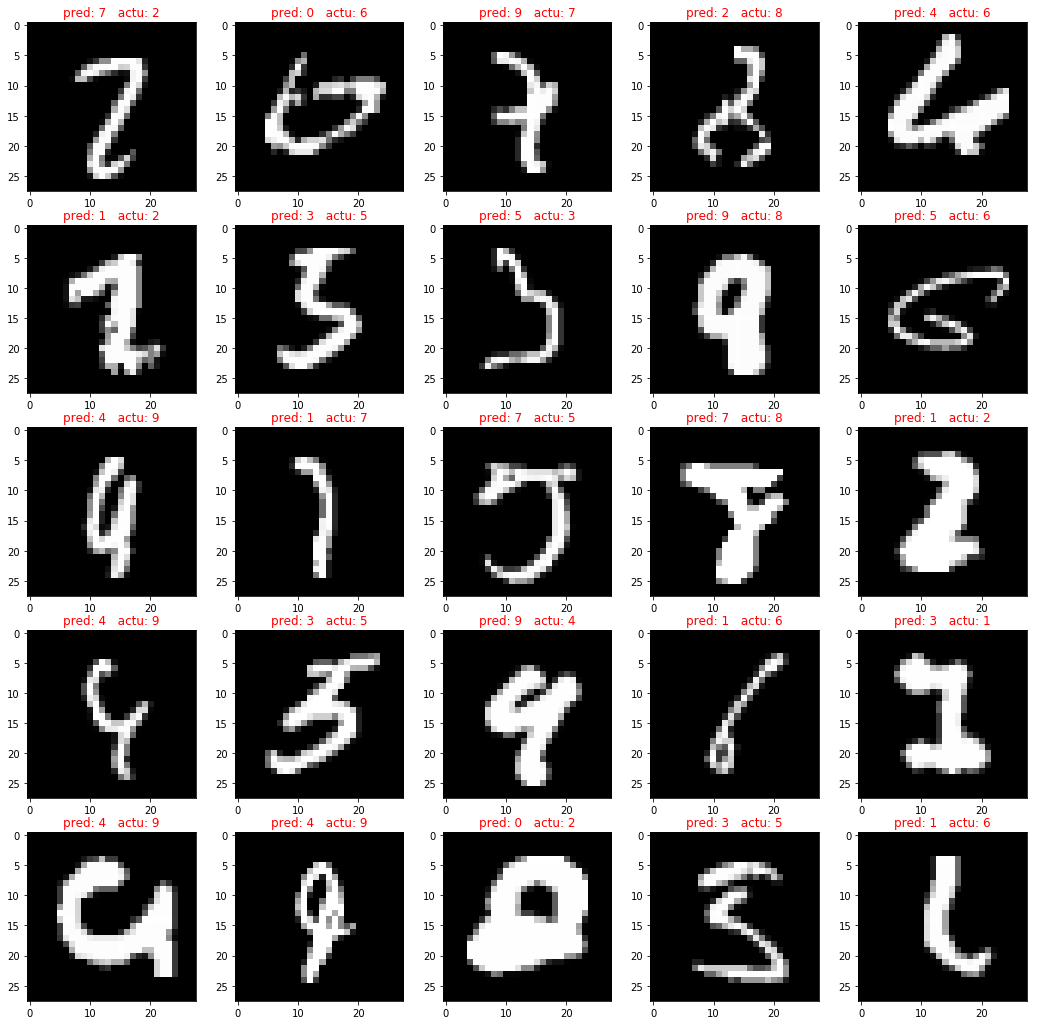

In [18]:
plt.figure(figsize=(18,18))
batch_size = 25
i = 0
for img in X_test_wrong:
  ax = plt.subplot(5,5,i+1)
  ax.set_title("pred: {}   actu: {}".format(img[1], img[2]), color='r')
  plt.imshow(np.reshape(img[0], (28,28)), cmap=plt.cm.gray)
  i += 1

In [0]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[8.36496739e-08 2.84598264e-06 1.60948980e-06 4.23295023e-06
  6.44205844e-09 2.64089870e-08 2.44252622e-11 9.99983430e-01
  1.49648134e-08 7.67730398e-06]
 [5.49260367e-05 1.27937499e-04 9.99729693e-01 8.66626522e-07
  8.74855323e-06 1.62184455e-09 7.66014273e-05 3.88026642e-08
  1.10638655e-06 3.89223018e-08]
 [2.11669067e-06 9.99828339e-01 5.36713560e-05 9.26192456e-08
  3.89936395e-05 8.58853355e-07 1.12022337e-06 7.09417218e-05
  5.64726236e-07 3.23827567e-06]
 [9.97356892e-01 1.20941470e-08 5.36034895e-06 5.65193830e-07
  5.23354038e-06 2.06551113e-06 2.58853356e-03 3.37635271e-07
  6.24096219e-06 3.47417699e-05]
 [1.30808003e-10 1.71737980e-07 3.19136007e-08 2.51298959e-09
  9.99987960e-01 2.41286440e-08 5.76899140e-07 1.36210012e-08
  5.59954003e-07 1.06440275e-05]
 [1.39674080e-06 9.99865532e-01 2.93777703e-05 3.19839728e-08
  3.89165543e-05 1.79115943e-07 6.53745246e-07 6.08599112e-05
  6.32486888e-07 2.32517777e-06]
 [2.42965481e-10 1.30409562e-05 2.24828668e-07 6.40739950e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

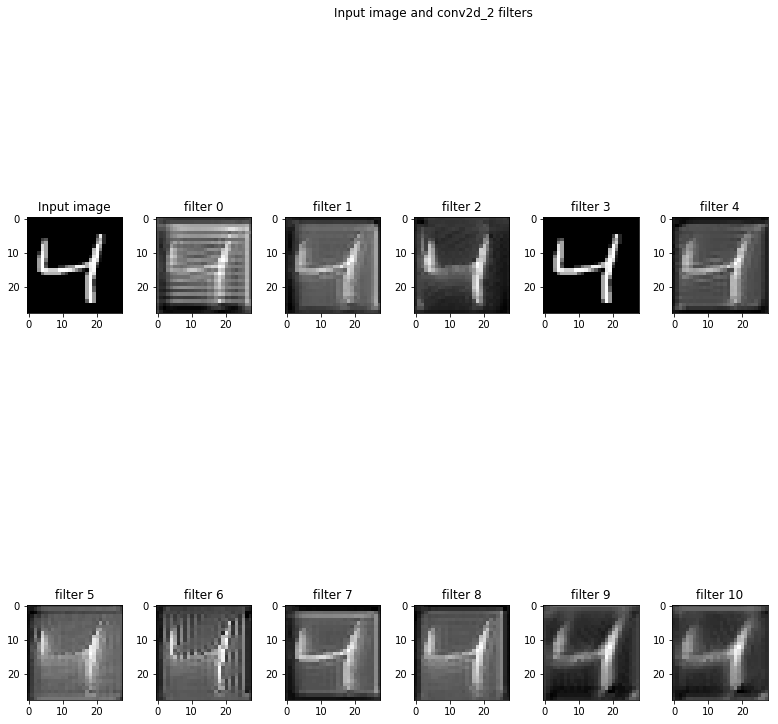

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()